In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize_scalar

In [2]:
# Define parameters
eps, theta, eta, lam = sp.symbols('eps theta eta lam', real=True)

Derive H(X|Y) as a function of error rate

In [3]:
# Calculate the constant H(X|Y) given etailon
h_XY = -eps * sp.log(eps, 2) - (1 - eps) * sp.log(1 - eps, 2)

h_XY

-eps*log(eps)/log(2) - (1 - eps)*log(1 - eps)/log(2)

Derive H(X|Z) as a function of theta

In [4]:
p_hel = 1/2 * (1 + sp.sqrt((1 - sp.cos(theta)) / 2)) # derived from Helstrom measurement
Fe = 0.5 * (1 + sp.cos(sp.asin(1 - 2 * eps)))
p_suc = Fe * p_hel

h_XZ = -p_suc * sp.log(p_suc, 2) - (1 - p_suc) * sp.log(1 - p_suc, 2)

h_XZ

-(-(0.5*sqrt(1/2 - cos(theta)/2) + 0.5)*(0.5*sqrt(1 - (2*eps - 1)**2) + 0.5) + 1)*log(-(0.5*sqrt(1/2 - cos(theta)/2) + 0.5)*(0.5*sqrt(1 - (2*eps - 1)**2) + 0.5) + 1)/log(2) - (0.5*sqrt(1/2 - cos(theta)/2) + 0.5)*(0.5*sqrt(1 - (2*eps - 1)**2) + 0.5)*log((0.5*sqrt(1/2 - cos(theta)/2) + 0.5)*(0.5*sqrt(1 - (2*eps - 1)**2) + 0.5))/log(2)

Plot H(X|Z) graph

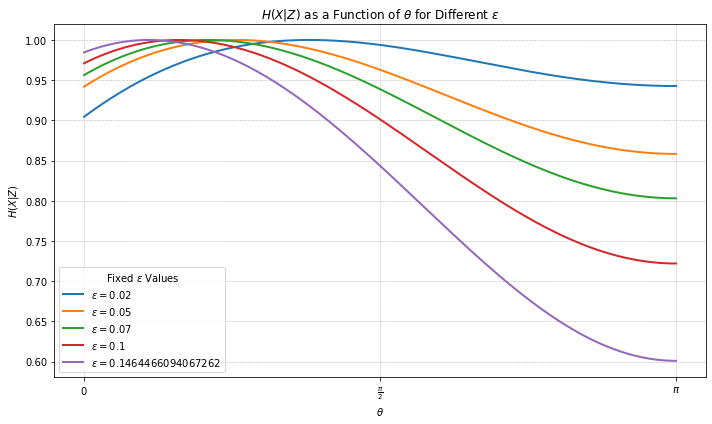

In [5]:
# Plot H(X|Z) against theta

h_XZ_func = sp.lambdify((eps, theta), h_XZ, 'numpy')

# Set up ranges for epsilon and theta
eps_vals = np.linspace(0, (2 - math.sqrt(2)) / 4, 200)
theta_vals = np.linspace(0, np.pi, 200)

plt.figure(figsize=(10, 6))

for eps_val in [0.02, 0.05, 0.07, 0.1, (2 - math.sqrt(2)) / 4]:
    h_XZ_vals = h_XZ_func(eps_val, theta_vals)
    plt.plot(theta_vals, h_XZ_vals, label=f'$\\epsilon = {eps_val}$', lw=2)

plt.xlabel(r'$\theta$')
plt.ylabel(r'$H(X|Z)$')
plt.title(r'$H(X|Z)$ as a Function of $\theta$ for Different $\epsilon$')
plt.xticks([0, np.pi / 2, np.pi],
           [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.legend(title="Fixed $\epsilon$ Values")
plt.tight_layout()
plt.show()

Derive R as a fucntion of theta and error rate

In [6]:
# Find the proportion of usable rounds from key disrtribution phase (form raw key)
f_distibute = 1/4 * (1 - sp.cos(theta))

f_distibute

0.25 - 0.25*cos(theta)

In [7]:
# Find the proportion of which the raw key can be shrunk
_f_rawkey = h_XZ - h_XY
f_rawkey = sp.simplify(_f_rawkey)

f_rawkey

(eps*log(eps) - (eps - 1)*log(1 - eps) + ((0.5*sqrt(1 - (2*eps - 1)**2) + 0.5)*(0.25*sqrt(2 - 2*cos(theta)) + 0.5) - 1)*log((0.25*sqrt(2)*sqrt(1 - cos(theta)) + 0.5)*(-0.5*sqrt(1 - (2*eps - 1)**2) - 0.5) + 1) + (-0.5*sqrt(1 - (2*eps - 1)**2) - 0.5)*(0.25*sqrt(2 - 2*cos(theta)) + 0.5)*log((0.25*sqrt(2)*sqrt(1 - cos(theta)) + 0.5)*(0.5*sqrt(1 - (2*eps - 1)**2) + 0.5)))/log(2)

In [8]:
# Key generating rate R = proportion of raw key formed from distributed bits x proportion of raw key retained
_R = f_distibute * f_rawkey
R = sp.simplify(_R)

R

-0.25*(cos(theta) - 1)*(eps*log(eps) - (eps - 1)*log(1 - eps) + ((0.5*sqrt(1 - (2*eps - 1)**2) + 0.5)*(0.25*sqrt(2 - 2*cos(theta)) + 0.5) - 1)*log(-(0.25*sqrt(2)*sqrt(1 - cos(theta)) + 0.5)*(0.5*sqrt(1 - (2*eps - 1)**2) + 0.5) + 1) - (0.5*sqrt(1 - (2*eps - 1)**2) + 0.5)*(0.25*sqrt(2 - 2*cos(theta)) + 0.5)*log((0.25*sqrt(2)*sqrt(1 - cos(theta)) + 0.5)*(0.5*sqrt(1 - (2*eps - 1)**2) + 0.5)))/log(2)

Plot R graphs

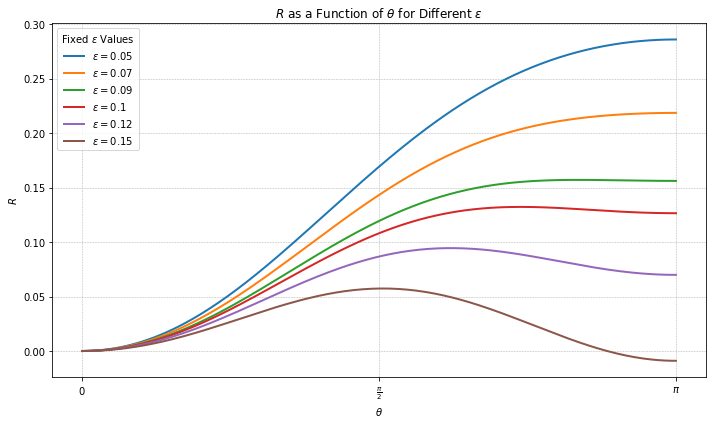

In [9]:
# Plot R against theta for different values of Eps

R_func = sp.lambdify((theta, eps), R, 'numpy') 
theta_vals = np.linspace(0, np.pi - 1e-6, 200)

plt.figure(figsize=(10, 6))

for eps_val in [0.05, 0.07, 0.09, 0.1, 0.12, 0.15]: 
    R_vals = R_func(theta_vals, eps_val)
    plt.plot(theta_vals, R_vals, label=f'$\\epsilon = {eps_val}$', lw=2)

plt.xlabel(r'$\theta$')
plt.ylabel(r'$R$')
plt.title(r'$R$ as a Function of $\theta$ for Different $\epsilon$')
plt.xticks([0, np.pi / 2, np.pi],
           [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.legend(title="Fixed $\epsilon$ Values")
plt.tight_layout()
plt.show()

<lambdifygenerated-3>:2: RuntimeWarning: divide by zero encountered in log
  return -0.25*(cos(theta) - 1)*(eps*log(eps) - (eps - 1)*log(1 - eps) + ((0.5*sqrt(1 - (2*eps - 1)**2) + 0.5)*(0.25*sqrt(2 - 2*cos(theta)) + 0.5) - 1)*log(-(0.25*sqrt(2)*sqrt(1 - cos(theta)) + 0.5)*(0.5*sqrt(1 - (2*eps - 1)**2) + 0.5) + 1) - (0.5*sqrt(1 - (2*eps - 1)**2) + 0.5)*(0.25*sqrt(2 - 2*cos(theta)) + 0.5)*log((0.25*sqrt(2)*sqrt(1 - cos(theta)) + 0.5)*(0.5*sqrt(1 - (2*eps - 1)**2) + 0.5)))/log(2)
<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in multiply
  return -0.25*(cos(theta) - 1)*(eps*log(eps) - (eps - 1)*log(1 - eps) + ((0.5*sqrt(1 - (2*eps - 1)**2) + 0.5)*(0.25*sqrt(2 - 2*cos(theta)) + 0.5) - 1)*log(-(0.25*sqrt(2)*sqrt(1 - cos(theta)) + 0.5)*(0.5*sqrt(1 - (2*eps - 1)**2) + 0.5) + 1) - (0.5*sqrt(1 - (2*eps - 1)**2) + 0.5)*(0.25*sqrt(2 - 2*cos(theta)) + 0.5)*log((0.25*sqrt(2)*sqrt(1 - cos(theta)) + 0.5)*(0.5*sqrt(1 - (2*eps - 1)**2) + 0.5)))/log(2)


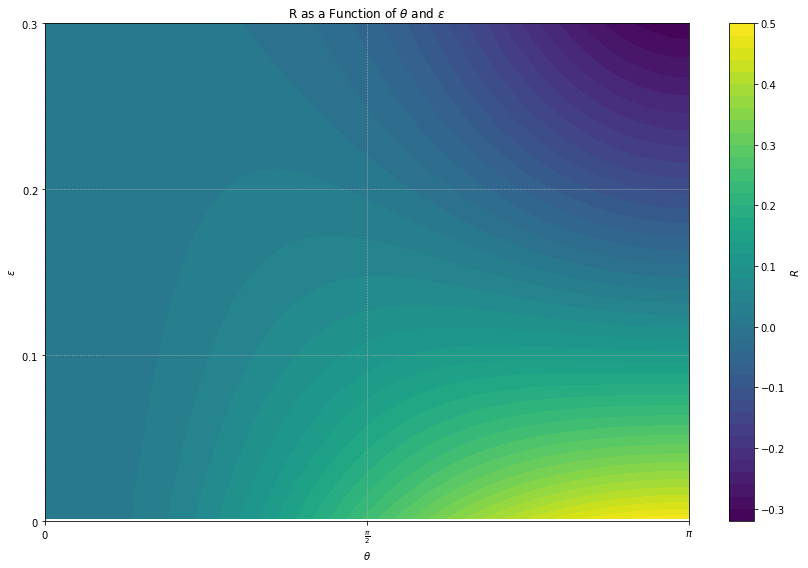

In [10]:
# Plot R agaisnt Theta and Eps
R_func = sp.lambdify((eps, theta), R, 'numpy')

# Set up ranges for epsilon and theta
eps_vals = np.linspace(0, 0.3, 200)
theta_vals = np.linspace(0, np.pi, 200)
eps_mesh, theta_mesh = np.meshgrid(eps_vals, theta_vals)

R_vals = R_func(eps_mesh, theta_mesh)

plt.figure(figsize=(12, 8))
contour = plt.contourf(theta_mesh, eps_mesh, R_vals, levels=50, cmap="viridis")
plt.colorbar(contour, label=r'$R$')

plt.xlabel(r'$\theta$')
plt.ylabel(r'$\epsilon$')
plt.title(r'R as a Function of $\theta$ and $\epsilon$')
plt.xticks([0, np.pi / 2, np.pi],
           [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.yticks([0, 0.1, 0.2, 0.3],
           [r'$0$', r'$0.1$', r'$0.2$', r'$0.3$'])
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Solve for optimal theta that maximises R

In [11]:
# Find optimal theta

R_func = sp.lambdify((eps, theta), R, 'numpy')

def find_optimal_theta(eps_val):
    def neg_R(theta):
        return -R_func(eps_val, theta)

    result = minimize_scalar(neg_R, bounds=(0, np.pi), method="bounded")

    optimal_theta = result.x
    return optimal_theta

eps_val = 0.07
optimal_theta = find_optimal_theta(eps_val)
print(f"Optimal theta for epsilon = {eps_val}: {optimal_theta}")

f_R = R.subs({eps: eps_val, theta: optimal_theta})
R_value = f_R.evalf()
print(f"Corresponding R = {R_value}")

Optimal theta for epsilon = 0.07: 3.14158682022302
Corresponding R = 0.218547127363524


Find critical error rate (bound on R = 0.05 and R < 0)

In [13]:
# Find critical error rate
def find_critical_eps_binary(eps_start=0.01, eps_end=0.5, tol=1e-6):
    eps_low = eps_start
    eps_high = eps_end

    while eps_high - eps_low > tol:
        eps_mid = (eps_low + eps_high) / 2

        cur_theta = find_optimal_theta(eps_mid)
        R_value = R_func(eps_mid, cur_theta)

        if R_value < 0.05:
            eps_high = eps_mid
        else:
            eps_low = eps_mid

    critical_eps = (eps_low + eps_high) / 2
    final_theta = find_optimal_theta(critical_eps)
    final_R = R_func(critical_eps, final_theta)

    return critical_eps, final_R

eps_critical, R_critical = find_critical_eps_binary(eps_start=0.01, eps_end=0.5)

print(f"critical epsilon = {eps_critical}")
print(f"R = {R_critical}")


critical epsilon = 0.15826273918151856
R = 0.04999985472144828


In [14]:
# Find critical error rate
def find_critical_eps_binary(eps_start=0.01, eps_end=0.5, tol=1e-6):
    eps_low = eps_start
    eps_high = eps_end

    while eps_high - eps_low > tol:
        eps_mid = (eps_low + eps_high) / 2

        cur_theta = find_optimal_theta(eps_mid)
        R_value = R_func(eps_mid, cur_theta)

        if R_value < 0:
            eps_high = eps_mid
        else:
            eps_low = eps_mid

    critical_eps = (eps_low + eps_high) / 2
    final_theta = find_optimal_theta(critical_eps)
    final_R = R_func(critical_eps, final_theta)

    return critical_eps, final_R

eps_critical, R_critical = find_critical_eps_binary(eps_start=0.01, eps_end=0.5)

print(f"critical epsilon = {eps_critical}")
print(f"R = {R_critical}")


critical epsilon = 0.4999985980987549
R = 3.192957827339416e-24


Analysis and Plots

In [15]:
# Find max R
min_eps = 1e-6 # 0.000001
max_theta = find_optimal_theta(min_eps)
max_R = R.subs({eps: min_eps, theta: optimal_theta})
max_R_value = max_R.evalf()

print(f"Max R: {max_R_value}")

Max R: 0.499987870169745


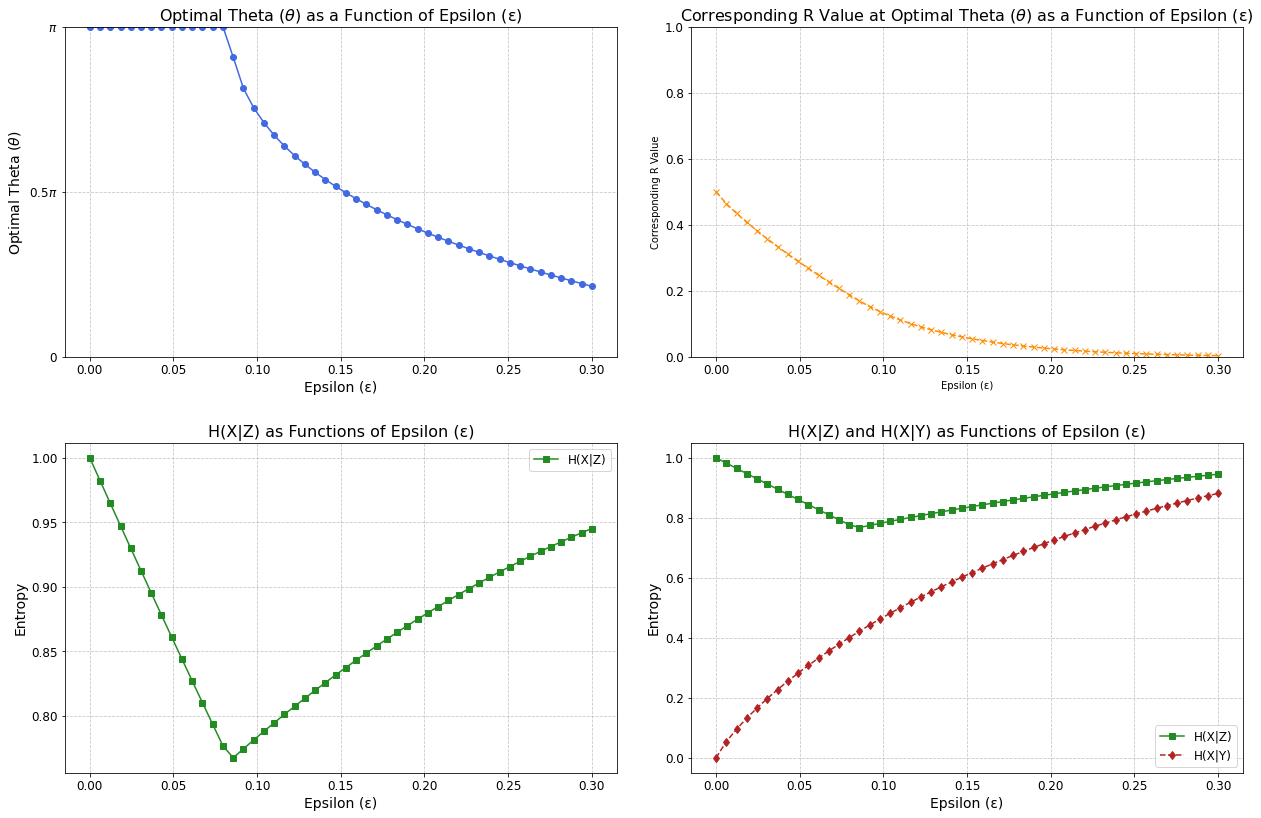

In [26]:
# Plot for analysis

eps_values = np.linspace(1e-6, 0.3, 50)
optimal_theta_values = []
optimal_R_values = []
h_XZ_values = []
h_XY_values = []

for eps_val in eps_values:
    opt_theta = find_optimal_theta(eps_val)
    optimal_theta_values.append(opt_theta)
    optimal_R_values.append(R_func(eps_val, opt_theta))
    h_XZ_values.append(h_XZ_func(eps_val, opt_theta))
    h_XY_values.append(-eps_val * np.log2(eps_val + 1e-10) - (1 - eps_val) * np.log2(1 - eps_val + 1e-10))

plt.figure(figsize=(18, 12)) 

# Plot for Optimal theta
plt.subplot(2, 2, 1)
plt.plot(eps_values, optimal_theta_values, marker='o', linestyle='-', color='royalblue', markersize=6, linewidth=1.5)
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel(r'Optimal Theta ($\theta$)', fontsize=14)
plt.title(r'Optimal Theta ($\theta$) as a Function of Epsilon (ε)', fontsize=16)
plt.ylim(0, np.pi)
plt.yticks([0, np.pi / 2, np.pi],
           [r'$0$', r'$0.5{\pi}$', r'$\pi$'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot for Corresponding R Values
plt.subplot(2, 2, 2) 
plt.plot(eps_values, optimal_R_values, marker='x', linestyle='--', color='darkorange', markersize=6, linewidth=1.5)
plt.xlabel('Epsilon (ε)')
plt.ylabel('Corresponding R Value')
plt.title(r'Corresponding R Value at Optimal Theta ($\theta$) as a Function of Epsilon (ε)', fontsize=16)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot for H(X|Z)
plt.subplot(2, 2, 3)
plt.plot(eps_values, h_XZ_values, marker='s', linestyle='-', color='forestgreen', markersize=6, linewidth=1.5, label='H(X|Z)')
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel('Entropy', fontsize=14)
plt.title('H(X|Z) as Functions of Epsilon (ε)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Plot for H(X|Y) and H(X|Z)
plt.subplot(2, 2, 4)
plt.plot(eps_values, h_XZ_values, marker='s', linestyle='-', color='forestgreen', markersize=6, linewidth=1.5, label='H(X|Z)')
plt.plot(eps_values, h_XY_values, marker='d', linestyle='--', color='firebrick', markersize=6, linewidth=1.5, label='H(X|Y)')
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel('Entropy', fontsize=14)
plt.title('H(X|Z) and H(X|Y) as Functions of Epsilon (ε)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot
plt.tight_layout(pad=3.0)
plt.show()

Find upper bound of Eve's infomation gain I(X;Z)

In [25]:
# Find critical point of H(X|Z)

hxz_func = sp.lambdify((eps, theta), h_XZ, 'numpy')
d_hxz = sp.diff(h_XZ, eps)
d_hxz_func = sp.lambdify((eps, theta), d_hxz, 'numpy')

def H_XZ_gradient_descent(eps_start=0.08, learning_rate=0.001, max_iter=100, decay=0.99):
    eps_cur = eps_start
    lr = learning_rate

    optimal_theta = find_optimal_theta(eps_cur)
    H_XZ_cur = hxz_func(eps_cur, optimal_theta)

    for i in range(max_iter):
        optimal_theta = find_optimal_theta(eps_cur)
        gradient = d_hxz_func(eps_cur, optimal_theta)

        eps_next = eps_cur - lr * gradient
        eps_next = max(0.07, min(eps_next, 0.1))

        optimal_theta_next = find_optimal_theta(eps_next)
        H_XZ_next = hxz_func(eps_next, optimal_theta_next)

        if H_XZ_next > H_XZ_cur:
            break

        eps_cur, H_XZ_cur = eps_next, H_XZ_next
        lr *= decay

    return eps_cur, H_XZ_cur

eps_critical, hxz_critical = H_XZ_gradient_descent()
eps_critical, hxz_critical

(0.08539668803648019, 0.7672837804070842)

In [18]:
# Find upper bound on Eve's knowledge I(X;Z) = H(X) - H(X|Z)
i_hz = 1 - hxz_critical

print(f"Upper bound of Eve's knowledge: {i_hz}")

Upper bound of Eve's knowledge: 0.23271621959291577


Analyse Eve's Cloning Strategy

In [19]:
# Compare H(X|Z) and h(Fe)

# Define fidelity of Eve and the binary entropy h(Fe)
Fe = 0.5 * (1 + sp.cos(sp.asin(1 - 2 * eps)))
h_Fe = -Fe * sp.log(Fe, 2) - (1 - Fe) * sp.log(1 - Fe, 2)

# Substitute eps and corresponding optimal theta value
sh_xz = h_XZ.subs({eps: eps_val, theta: optimal_theta})
sh_Fe = h_Fe.subs({eps: eps_val})
sh_xz_value = sh_xz.evalf()
sh_Fe_value = sh_Fe.evalf()

print(f"H(X|Z): {sh_xz_value}")
print(f"h(Fe): {sh_Fe_value}")

H(X|Z): 0.250224911620284
h(Fe): 0.250224911611071


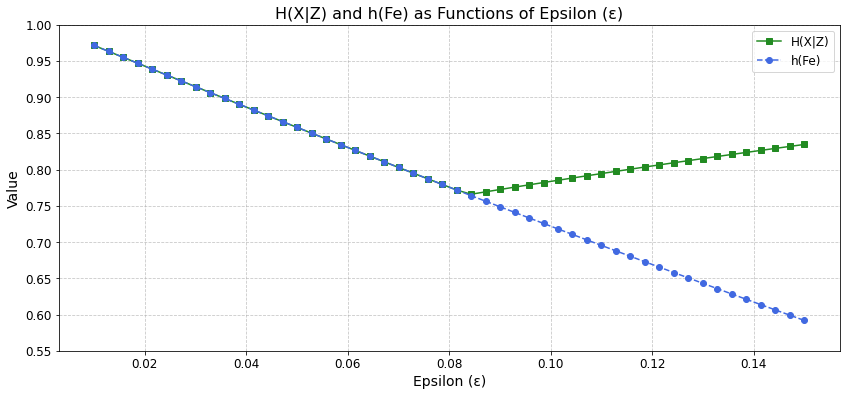

In [20]:
Fe_func = sp.lambdify(eps, Fe, 'numpy')
h_Fe_func = sp.lambdify(eps, h_Fe, 'numpy')

eps_values = np.linspace(0.01, 0.15, 50)
optimal_theta_values = []
optimal_R_values = []
h_values = []
Fe_values = []
h_Fe_values = []

for eps_val in eps_values:
    opt_theta = find_optimal_theta(eps_val)
    optimal_theta_values.append(opt_theta)
    optimal_R_values.append(R_func(eps_val, opt_theta))
    h_values.append(h_XZ_func(eps_val,opt_theta))
    Fe_values.append(Fe_func(eps_val))  # Compute Fe
    h_Fe_values.append(h_Fe_func(eps_val))  # Compute h(Fe)

# Plot for H(X|Z)
plt.figure(figsize=(14, 6)) 
plt.plot(eps_values, h_values, marker='s', linestyle='-', color='forestgreen', markersize=6, linewidth=1.5, label='H(X|Z)')
plt.plot(eps_values, h_Fe_values, marker='o', linestyle='--', color='royalblue', markersize=6, linewidth=1.5, label='h(Fe)')
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('H(X|Z) and h(Fe) as Functions of Epsilon (ε)', fontsize=16)
plt.ylim(0.55, 1)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout and display
plt.show()

In [21]:
# Find intersection where afterwards Eve's strategy becomes less effective

hxz_func = sp.lambdify((eps, theta), h_XZ, 'numpy')
hfe_func = sp.lambdify(eps, h_Fe, 'numpy')

def find_intersection(eps_start=0.08, learning_rate=0.0001, max_iter=1000, tol=1e-6, decay=0.99):
    eps_cur = eps_start
    lr = learning_rate

    for i in range(max_iter):
        optimal_theta = find_optimal_theta(eps_cur)
        hxz_value = hxz_func(eps_cur, optimal_theta)
        hfe_value = hfe_func(eps_cur)
        diff = hxz_value - hfe_value

        if abs(diff) > tol:
            break

        eps_next = eps_cur + learning_rate
        eps_next = max(0.08, min(eps_next, 0.09))

        eps_cur = eps_next
        lr *= decay

    final_theta = find_optimal_theta(eps_cur)
    hxz_final = hxz_func(eps_cur, final_theta)
    hfe_final = hfe_func(eps_cur)
    diff_final = hxz_final - hfe_final

    return eps_cur, hxz_final, hfe_final, diff_final

# Run the intersection calculation
eps_intersection, hxz_at_intersection, hfe_at_intersection, diff_at_intersection = find_intersection()

print(f"intersection occurs at epsilon = {eps_intersection:.6f}")
print(f"difference = {diff_at_intersection:.6f}")

intersection occurs at epsilon = 0.083900
difference = 0.000378


In [22]:
# The CM parameter critical point
eta = sp.asin(1 - 2 * eps_intersection) / np.pi

print(f"eta = {eta} pi")

eta = 0.312918882878948 pi


Save Results to csv File for Further Analysis

In [23]:
import pandas as pd
import os

R_func = sp.lambdify((eps, theta), R, 'numpy')
eps_values = np.linspace(1e-8, 0.5 - 1e-8, 100)

optimal_theta_values = []
optimal_R_values = []
h_XZ_values = []
h_XY_values = []
h_Fe_values = []

for eps_val in eps_values:
    opt_theta = find_optimal_theta(eps_val)
    optimal_theta_values.append(opt_theta)
    optimal_R_values.append(R_func(eps_val, opt_theta))
    h_XZ_values.append(h_XZ_func(eps_val, opt_theta))
    h_XY_values.append(-eps_val * np.log2(eps_val + 1e-10) - (1 - eps_val) * np.log2(1 - eps_val + 1e-10))
    h_Fe_values.append(h_Fe_func(eps_val))

data = {
    "eps": eps_values,
    "optimal_theta": optimal_theta_values,
    "R": optimal_R_values,
    "h_XZ": h_XZ_values,
    "h_XY": h_XY_values,
    "h_Fe": h_Fe_values
}
df_results = pd.DataFrame(data)

# Save to CSV
current_directory = os.getcwd()
csv_path = os.path.join(current_directory, "individual_attack.csv")
df_results.to_csv(csv_path, index=False)